<a href="https://colab.research.google.com/github/HeydarAbdurahmanov/Customer-Lifetime-Value-Analytics/blob/main/Customer_Lifetime_Value_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer lifetime value (CLTV) is the estimated total amount a customer will spend on a business throughout their relationship with that business. It takes into account the revenue generated by the customer as well as the costs associated with acquiring and serving that customer. By analyzing the relationship between customer acquisition costs and revenue generated, we can determine which channels are the most cost-effective for acquiring and retaining high-value customers.

The given data includes information about the customer’s channel, cost of acquisition, conversion rate, and revenue generated. Our task is to analyze the CLTV of customers across different channels and identify the most profitable channels for the business.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv("/content/customer_acquisition_data.csv")
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


Let’s start by visualizing the distribution of acquisition cost and revenue generated by the customer using histograms:

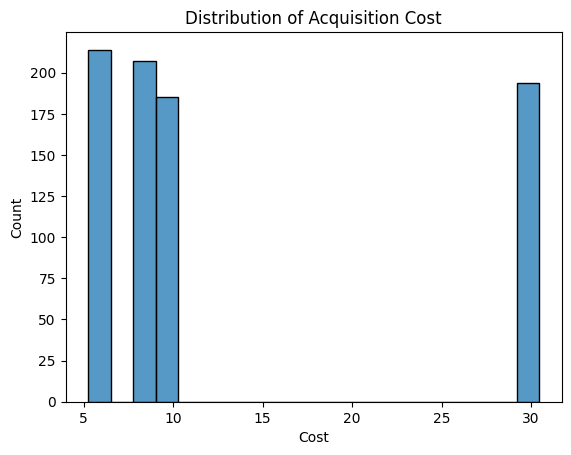

In [58]:
sns.histplot(data['cost'], bins=20)
plt.title('Distribution of Acquisition Cost')
plt.xlabel('Cost')
plt.ylabel('Count')

plt.show()

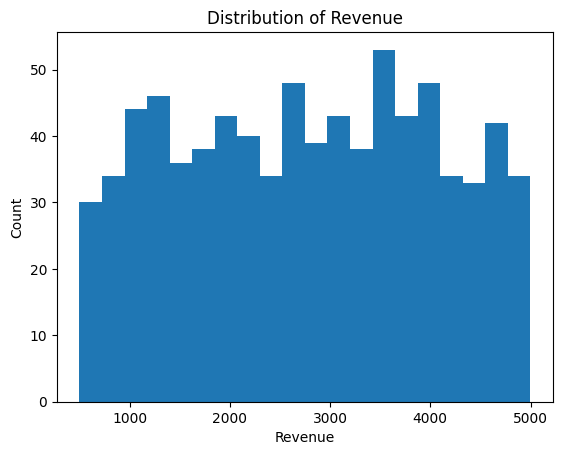

In [59]:
plt.hist(data['revenue'], bins=20)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.show()

Now let’s compare the cost of acquisition across different channels and identify the most and least profitable channels:

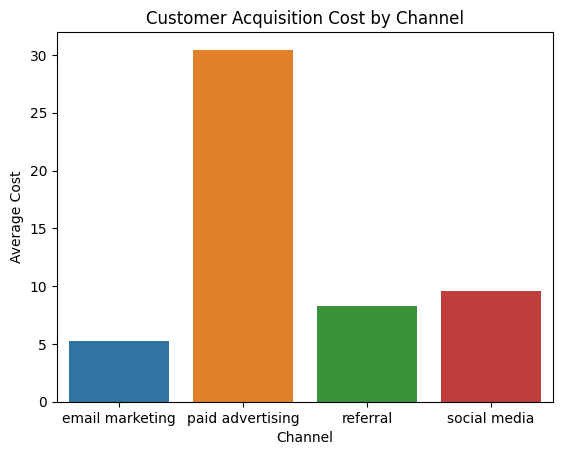

In [60]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

sns.barplot(data=cost_by_channel, x='channel', y='cost')
plt.title('Customer Acquisition Cost by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Cost')

plt.show()


So paid advertisement is the most expensive channel, and email marketing is the least expensive channel. Now let’s see which channels are most and least effective at converting customers:

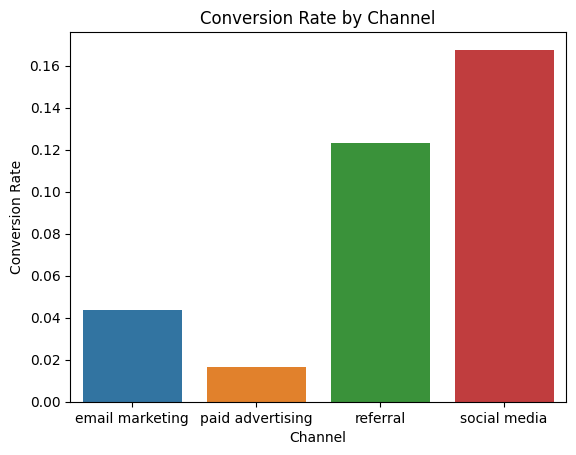

In [62]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

sns.barplot(data=conversion_by_channel, x='channel', y='conversion_rate')
plt.title('Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')

plt.show()


Social media is the most effective channel for converting customers, while paid advertising is the least effective. Now let’s calculate the total revenue by channel and have a look at the most and least profitable channels in terms of generating revenue:

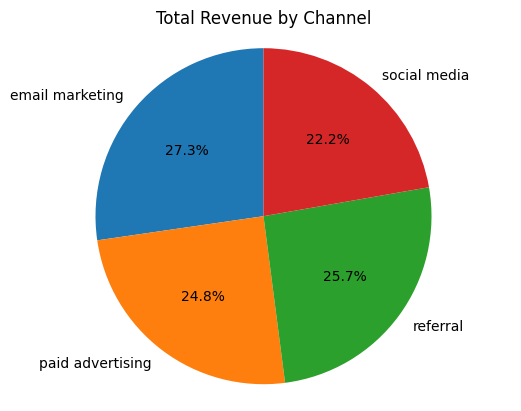

In [63]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue by Channel')
plt.axis('equal')

plt.show()


So email marketing is the most profitable channel in terms of generating revenue. But there’s not a huge difference between the percentages of revenue generation from all the channels to call any channel the least profitable channel.
Now let’s calculate the return on investment (ROI) for each channel:

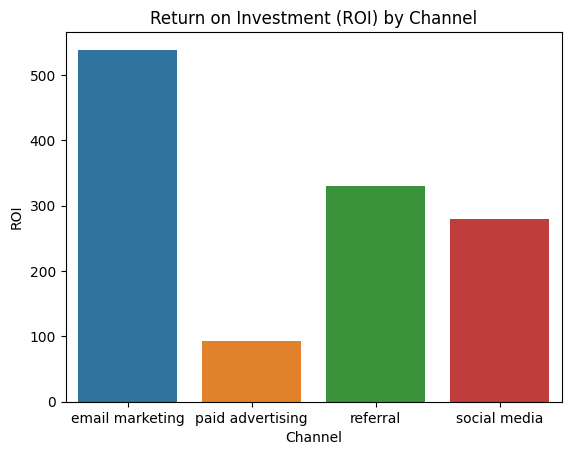

In [64]:
data['roi'] = data['revenue'] / data['cost']

roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

sns.barplot(data=roi_by_channel, x='channel', y='roi')
plt.title('Return on Investment (ROI) by Channel')
plt.xlabel('Channel')
plt.ylabel('ROI')

plt.show()


The ROI from email marketing is way higher than all other channels, while the ROI from paid advertising is the lowest. Now let’s calculate the customer lifetime value from each channel. Based on the data we have, we can use the formula mentioned below to calculate CLTV:

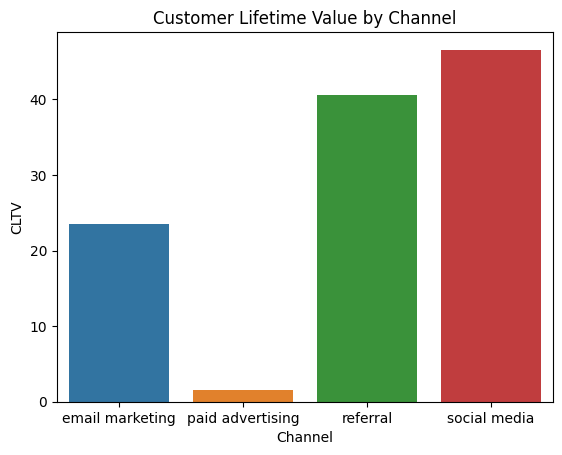

In [65]:

data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']

channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

sns.barplot(data=channel_cltv, x='channel', y='cltv')
plt.title('Customer Lifetime Value by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')

plt.show()

So the customer lifetime value from Social Media and the referral channels is the highest.

Now let’s compare the CLTV distributions of the social media and referral channels:

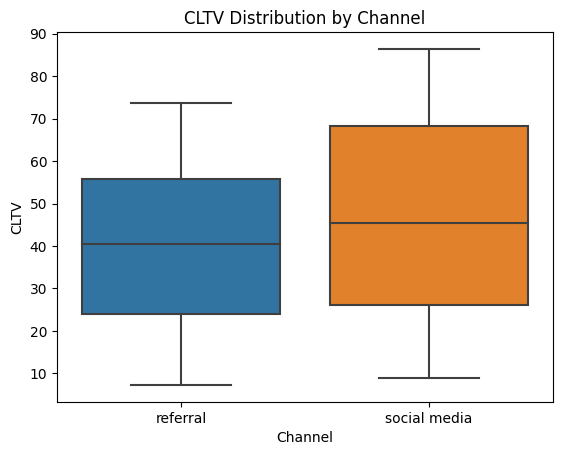

In [66]:

subset = data.loc[data['channel'].isin(['social media', 'referral'])]

sns.boxplot(data=subset, x='channel', y='cltv')
plt.title('CLTV Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')

plt.show()


There’s not much difference, but the Customer Lifetime Value from the Social Media channel is slightly better than the referral channel.

Customer lifetime value analysis is used to estimate the total value of customers to the business over the lifetime of their relationship. It helps companies determine how much to invest in customer acquisition and retention, as well as identify the most valuable customers to prioritize for retention efforts